# Variabilité lexicale et thématique dans des poèmes générés par ChatGPT: tests sur le prompting 

## Introduction

### Dataset 

Notre dataset est constitué de 200 poèmes, divisés en 4 groupes de 50. 1 groupe de poèmes humains, et 3 groupes de poèmes générés par ChatGPT.

En premier lieu, avons sélectionné **50 poèmes de la littérature "canonique"**. Les poèmes ont été écrits par les auteurs suivants: André Breton, Arthur Rimbaud, Alphonse de Lamartine, Alfred de Vigny, Charles Baudelaire, Guillaume Apollinaire, Gérard de Nerval, Jean Racine, Pierre Corneille, Pierre de Ronsard, Paul Verlaine, Stéphane Mallarmé, Tristan Tzara, Victor Hugo. 

Puis, nous avons généré des poèmes avec ChatGPT [préciser version]. Nous avons testé 3 différents niveaux de prompting (pour plus sur le prompt engineering, voir par exemple https://github.com/dair-ai/Prompt-Engineering-Guide/blob/main/guides/prompts-chatgpt.md). 

Pour le **premier niveau de prompting**, nous avons donné des indications minimales. Pour chaque poème de notre dataset de "poèmes humains", nous avons généré un poème en indicant le type de poème (sonnet, poème en écriture automatique, etc.) et le style de l'auteur.
- <span style="color:green">Ex : Écris un sonnet dans le style d'Arthur Rimbaud</span>

Pour le **deuxième niveau de prompting**, nous avons donné un example à imiter. Nous avons pris chaque poème de notre dataset de "poèmes humains" et demandé à ChatGPT de générer un poème ressemblant à celui-ci. 

- <span style="color:green;white-space:pre-line">Ex : Écris un poème qui ressemble à celui-ci : 
    Napoléon mourant vit une Tête armée… 
    Il pensait à son fils déjà faible et souffrant :
    La Tête, c’était donc sa France bien-aimée,
    Décapitée aux pieds du César expirant.</span>

    <span style="color:green;white-space:pre-line">Dieu, qui jugeait cet homme et cette renommée,
    Appela Jésus-Christ ; mais l’abîme s’ouvrant,
    Ne rendit qu’un vain souffle, un spectre de fumée :
    Le Demi-Dieu, vaincu, se releva plus grand.</span>
    
    <span style="color:green;white-space:pre-line">Alors on vit sortir du fond du purgatoire
    Un jeune homme inondé des pleurs de la Victoire,
    Qui tendit sa main pure au monarque des cieux ;</span>

    <span style="color:green;white-space:pre-line">Frappés au flanc tous deux par un double mystère,
    L’un répandait son sang pour féconder la Terre,
    L’autre versait au ciel la semence des dieux !</span>
 
 
 
 Pour le **troisième niveau de prompting**, nous avons donné des indications pour "reproduire" le poème. Nous avons indiqué le début du poème, la forme, les thèmes, les champs lexicaux, et le style général. 
- <span style="color:green">Ex: 12.	Voici des instructions pour écrire un poème : 
    - Commence par « Esprit parisien ! démon du Bas-Empire !
      Vieux sophiste épuisé qui boit, toutes les nuits, »
    - Respecte la forme sonnet (deux quatrains et deux tersets)
    - Ecris un poème qui parle de l’Esprit parisien en le personnifiant. Prends un ton cynique et ironique pour faire une critique sociale
    - Met en lumière l’hypocrisie, la cruauté et la superficialité de l’Esprit parisien </span>




### Méthode 
- Preprocessing -> spécifier les étapes 
- Variabilité lexicale : fréquence de mots, package 
- Variabilité thématique -> spécifier méthode 

# Analyse : variabilité lexicale 

## 1. Pre-processing  
### 1.1 Importation des poèmes 

In [1]:
# imports 
import pandas as pd
import os
import glob

In [2]:
# création de 4 listes de fichiers
human_poems = glob.glob('poems_humans/*.txt')
chatgpt_poems_1 = glob.glob('poems_chatGPT_1/*.txt')
chatgpt_poems_2 = glob.glob('poems_chatGPT_2/*.txt')
chatgpt_poems_3 = glob.glob('poems_chatGPT_3/*.txt')

In [3]:
# initalisation de la dataframe
df_poems = pd.DataFrame(columns=['file_name', 'poem','human_machine', 'reference'])

In [4]:
# insertion des poèmes dans une dataframe.
for idx, poem_f in enumerate(human_poems):
    poem_lines = open(poem_f, 'r').readlines()
    poem = ""
    for verse in poem_lines:
        poem += verse
    
    # récupération du nom du fichier 
    file_name = os.path.basename(poem_f) 
    df_poems.loc[idx, 'file_name'] = file_name
    # texte du poème
    df_poems.loc[idx, 'poem'] = poem
    # création d'une colonne "human_machine" qui spécifie si le poème vient d'un humain ou d'une machine
    df_poems.loc[idx, 'human_machine'] = 'H'

# insertion des poèmes ChatGPT de Niveau 1
for idx, poem_f in enumerate(chatgpt_poems_1):
    poem_lines = open(poem_f, 'r').readlines()
    poem = ""
    for verse in poem_lines:
        poem += verse
    
    file_name = os.path.basename(poem_f) 
    df_poems.loc[idx +50, 'file_name'] = file_name
    df_poems.loc[idx +50, 'poem'] = poem
    df_poems.loc[idx +50, 'human_machine'] = 'M'
    # on inscrit le niveau de prompting dans la colonne "reference"
    df_poems.loc[idx +50, 'reference'] = 'ChatGPT Level 1'
    
# insertion des poèmes ChatGPT de Niveau 2
for idx, poem_f in enumerate(chatgpt_poems_2):
    poem_lines = open(poem_f, 'r').readlines()
    poem = ""
    for verse in poem_lines:
        poem += verse
    
    file_name = os.path.basename(poem_f) 
    df_poems.loc[idx +100, 'file_name'] = file_name
    df_poems.loc[idx +100, 'poem'] = poem
    df_poems.loc[idx +100, 'human_machine'] = 'M'
    df_poems.loc[idx +100, 'reference'] = 'ChatGPT Level 2'

# insertion des poèmes ChatGPT de Niveau 3
for idx, poem_f in enumerate(chatgpt_poems_3):
    poem_lines = open(poem_f, 'r').readlines()
    poem = ""
    for verse in poem_lines:
        poem += verse
    
    file_name = os.path.basename(poem_f) 
    df_poems.loc[idx +150, 'file_name'] = file_name
    df_poems.loc[idx +150, 'poem'] = poem
    df_poems.loc[idx +150, 'human_machine'] = 'M'
    df_poems.loc[idx +150, 'reference'] = 'ChatGPT Level 3'

In [5]:
len(df_poems.index)

200

In [6]:
df_poems.sample(10)

,file_name,poem,human_machine,reference
39,16cb3.txt,Les amoureux fervents et les savants austères\...,H,NaN
139,16cb3.txt,Les amoureux passionnés et les sages austères\...,M,ChatGPT Level 2
10,49vh3.txt,"Ô ville, tu feras agenouiller l’histoire.\nSai...",H,NaN
175,24gn3.txt,"Ce roc voûté par art, chef-d'œuvre d'un autre ...",M,ChatGPT Level 3
153,20ga2.txt,"Sous le pont Mirabeau coule la Seine,\nEt nos ...",M,ChatGPT Level 3
184,32pr1.txt,Comme on voit sur la branche au mois de mai la...,M,ChatGPT Level 3
20,15cb2.txt,La Nature est un temple où de vivants piliers\...,H,NaN
79,21ga3.txt,"Chère amie, ton regard clair comme l'aube,\nIl...",M,ChatGPT Level 1
66,5al2.txt,"Tel un joyau volant dans l'air,\nLe papillon v...",M,ChatGPT Level 1
61,9ar3.txt,"L'horizon fuit et le soleil s'éteint,\nLes omb...",M,ChatGPT Level 1


In [7]:
# on remplit la colonne référence pour les poèmes humains (PH) avec le nom et l'auteur du poème original 
for idx, row in enumerate(df_poems[:50].itertuples(index=False), start=0):
    splt = row.poem.rsplit("\n", 1)
    df_poems.loc[idx, 'reference'] = splt[1]
    df_poems.loc[idx, 'poem'] = splt[0]

df_poems.head()

,file_name,poem,human_machine,reference
0,43sa.txt,"Fade rumeur de jour, l’aube emplit sa besace\n...",H,"Francis Etienne Sicard, Lettres de soie rouge,..."
1,40sm2.txt,"Le soleil, sur le sable, ô lutteuse endormie,\...",H,"Stéphane Mallarmé, Tristesse d'été"
2,10ar4.txt,C’est un large buffet sculpté ; le chêne sombr...,H,"Arthur Rimbaud, Le buffet"
3,20ga2.txt,Sous le pont Mirabeau coule la Seine\nEt nos a...,H,"Guillaume Apollinaire, Le Pont Mirabeau"
4,42sm4.txt,La Nuit approbatrice allume les onyx\nDe ses o...,H,"Stéphane Mallarmé, Sonnet en X"


### 1.2 Preprocessing : séquençage du texte

In [8]:
df_poems_backup = df_poems.copy()

In [9]:
# remove the \n 
for idx, poem in enumerate(df_poems.poem):
    # remove newlines and convert to lowercase
    df_poems.loc[idx, 'poem'] = poem.replace('\n', ' ').lower()

In [10]:
# Tokenization 
import nltk 

# download the Punkt tokenizer
nltk.download('punkt')

# create a list of all poems
poems = df_poems.poem

# create a list of the tokenized poems 
tokenized_poems = []

# remove the \n 
for poem in poems:

    # tokenize the poem using NLTK's Punkt tokenizer
    tokens = nltk.tokenize.word_tokenize(poem)
    # add the tokenized poem to the list
    tokenized_poems.append(tokens)
    
print(f"Poem 1 tokenized:")
print(tokenized_poems[0])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/margauxleplattenier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Poem 1 tokenized:
['fade', 'rumeur', 'de', 'jour', ',', 'l', '’', 'aube', 'emplit', 'sa', 'besace', 'de', 'brindilles', 'd', '’', 'étoile', 'et', 'de', 'rameaux', 'de', 'vent', ',', 'soufflant', 'des', 'braises', 'd', '’', 'or', 'derrière', 'un', 'paravent', ',', 'dont', 'l', '’', 'immense', 'vitrail', 'dessine', 'une', 'rosace', '.', 'des', 'nuages', 'de', 'perle', 'aux', 'rondeurs', 'de', 'fouace', ',', 'exhalent', 'des', 'parfums', 'extraits', 'du', 'firmament', ',', 'qu', '’', 'une', 'courtine', 'en', 'soie', 'habille', 'élégamment', 'de', 'son', 'satin', 'rosé', 'dérobé', 'd', '’', 'un', 'palace', '.', 'on', 'entend', 'le', 'matin', 'se', 'plonger', 'dans', 'un', 'bain', 'et', 'tendre', 'sa', 'peau', 'nue', 'aux', 'doigts', 'd', '’', 'un', 'chapelain', 'dont', 'le', 'rosaire', 'en', 'buis', 'se', 'froisse', 'd', '’', 'une', 'larme', '.', 'quand', 'enfin', 'paraît', 'l', '’', 'astre', 'aux', 'rayons', 'de', 'vermeil', ',', 'effaçant', 'de', 'son', 'feu', 'les', 'traces', 'du', 'som

In [11]:
# enlever les mots trop courants (stopwords) et la ponctuation
import string

stopwords = set(nltk.corpus.stopwords.words('french'))

filtered_poems = []

for tokenized_poem in tokenized_poems:
    filtered_poem = [w for w in tokenized_poem if not w in stopwords and not w in string.punctuation and w != '’']
    filtered_poems.append(filtered_poem)

print(f"Poem 1 after stopwords removal:")
print(filtered_poems[0])

Poem 1 after stopwords removal:
['fade', 'rumeur', 'jour', 'aube', 'emplit', 'besace', 'brindilles', 'étoile', 'rameaux', 'vent', 'soufflant', 'braises', 'or', 'derrière', 'paravent', 'dont', 'immense', 'vitrail', 'dessine', 'rosace', 'nuages', 'perle', 'rondeurs', 'fouace', 'exhalent', 'parfums', 'extraits', 'firmament', 'courtine', 'soie', 'habille', 'élégamment', 'satin', 'rosé', 'dérobé', 'palace', 'entend', 'matin', 'plonger', 'bain', 'tendre', 'peau', 'nue', 'doigts', 'chapelain', 'dont', 'rosaire', 'buis', 'froisse', 'larme', 'quand', 'enfin', 'paraît', 'astre', 'rayons', 'vermeil', 'effaçant', 'feu', 'traces', 'sommeil', 'rose', 'dentelle', 'éblouit', 'charme']


In [12]:
# lemmatization : provided by the package LexicalRichness ?? 

## 2. Variabilité lexicale (Lexical Richness)

Pour cette partie, nous avons utilisé le package LexicalRichness. Voir documentation  : https://github.com/LSYS/LexicalRichness/blob/master/README.rst 

In [13]:
from lexicalrichness import LexicalRichness

### 2.1 Métriques sur poèmes individuels 

In [14]:
len(df_poems.index) == len(filtered_poems)

True

In [15]:
# ajouts de colonnes pour compter le nombre de mots et le nombre de mots différents par poème 

for idx, row in df_poems.iterrows():
    lex = LexicalRichness(row['poem'])
    df_poems.loc[idx, 'words'] = lex.words
    df_poems.loc[idx, 'terms'] = lex.terms
    df_poems.loc[idx, 'ratio'] = lex.terms/lex.words
    # ajoutons une colonne tokens, qui contient le résultat du preprocessing effectué dans la partie 1.2

df_poems['tokens'] = filtered_poems
for idx, row in df_poems.iterrows():
    df_poems.loc[idx, 'num_tokens'] = len(row['tokens'])
    df_poems['tokens_unique'] = df_poems['tokens'].apply(lambda x: set(x))
    df_poems['num_tokens_unique'] = df_poems['tokens_unique'].apply(lambda x: len(x))
    df_poems.loc[idx, 'ratio_token'] = len(set(row['tokens'])) / len(row['tokens'])

df_poems.head()

,file_name,poem,human_machine,reference,words,terms,ratio,tokens,num_tokens,tokens_unique,num_tokens_unique,ratio_token
0,43sa.txt,"fade rumeur de jour, l’aube emplit sa besace d...",H,"Francis Etienne Sicard, Lettres de soie rouge,...",107.0,81.0,0.757009,"[fade, rumeur, jour, aube, emplit, besace, bri...",64.0,"{satin, courtine, entend, buis, aube, immense,...",63,0.984375
1,40sm2.txt,"le soleil, sur le sable, ô lutteuse endormie, ...",H,"Stéphane Mallarmé, Tristesse d'été",110.0,91.0,0.827273,"[soleil, sable, ô, lutteuse, endormie, or, che...",63.0,"{accalmie, néant, chauffe, endormie, tiède, sa...",61,0.968254
2,10ar4.txt,c’est un large buffet sculpté ; le chêne sombr...,H,"Arthur Rimbaud, Le buffet",122.0,87.0,0.713115,"[large, buffet, sculpté, chêne, sombre, très, ...",78.0,"{médaillons, peints, jaunes, parfum, vieux, ge...",71,0.910256
3,20ga2.txt,sous le pont mirabeau coule la seine et nos am...,H,"Guillaume Apollinaire, Le Pont Mirabeau",130.0,62.0,0.476923,"[sous, pont, mirabeau, coule, seine, amours, f...",85.0,"{venait, souvienne, cette, mains, jours, heure...",47,0.552941
4,42sm4.txt,la nuit approbatrice allume les onyx de ses on...,H,"Stéphane Mallarmé, Sonnet en X",111.0,85.0,0.765766,"[nuit, approbatrice, allume, onyx, ongles, pur...",62.0,"{fixe, consoles, tous, puiser, l'absence, soir...",61,0.983871


Text(0, 0.5, 'Ratio de token unique')

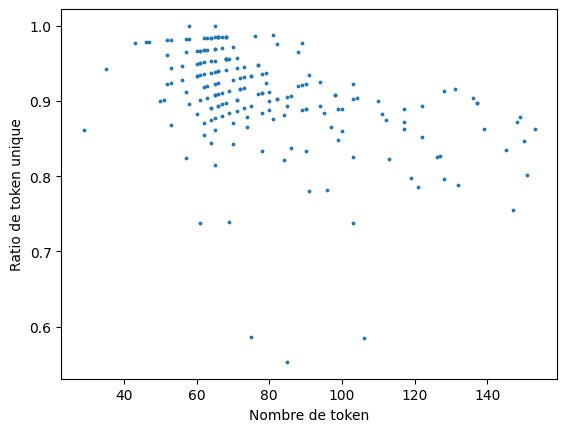

In [56]:
# Plot values to get overview 

# scatter plot num_tokens / ratio_token
plt.scatter(df_poems['num_tokens'], df_poems['ratio_token'], s=3) # s = size of the points

plt.xlabel('Nombre de token')
plt.ylabel('Ratio de token unique')

### 2.2 Comparer les ratios

In [18]:
# nous allons à présent comparer les valeurs des colonnes ratio et ratio_token
# le but est de voir si l'on observe des différences significatives entre les poèmes naturels (H) et les poèmes artificielles (M1, M2, M3).

# VERSION AMELIOREE EN 2.5

# on coupe notre df en 4
df_h = df_poems[df_poems['human_machine']=='H']
df_m1 = df_poems[df_poems['reference']=='ChatGPT Level 1']
df_m2 = df_poems[df_poems['reference']=='ChatGPT Level 2']
df_m3 = df_poems[df_poems['reference']=='ChatGPT Level 3']

ratio_stats_h = df_h['ratio'].describe()
ratio_tok_stats_h = df_h['ratio_token'].describe()

ratio_stats_m1 = df_m1['ratio'].describe()
ratio_tok_stats_m1 = df_m1['ratio_token'].describe()

ratio_stats_m2 = df_m2['ratio'].describe()
ratio_tok_stats_m2 = df_m2['ratio_token'].describe()

ratio_stats_m3 = df_m3['ratio'].describe()
ratio_tok_stats_m3 = df_m3['ratio_token'].describe()

print('Median ratio of unique words per poem:')
print(f'Human poems: {ratio_stats_h.median():.3f}')
print(f'ChatGPT poems Level 1: {ratio_stats_m1.median():.3f}') # ajouter interquartal range
print(f'ChatGPT poems Level 2: {ratio_stats_m2.median():.3f}')
print(f'ChatGPT poems Level 3: {ratio_stats_m3.median():.3f}')
print('----------------------------------')
print('Median ratio of unique token per poem (homemade pre-processing):')
print(f'Human poems: {ratio_tok_stats_h.median():.3f}')
print(f'ChatGPT poems Level 1: {ratio_tok_stats_m1.median():.3f}')
print(f'ChatGPT poems Level 2: {ratio_tok_stats_m2.median():.3f}')
print(f'ChatGPT poems Level 3: {ratio_tok_stats_m3.median():.3f}')


Median ratio of unique words per poem:
Human poems: 0.763
ChatGPT poems Level 1: 0.673
ChatGPT poems Level 2: 0.690
ChatGPT poems Level 3: 0.661
----------------------------------
Median ratio of unique token per poem (homemade pre-processing):
Human poems: 0.929
ChatGPT poems Level 1: 0.912
ChatGPT poems Level 2: 0.921
ChatGPT poems Level 3: 0.879


In [19]:
# + plot distribution of values for each group 

### 2.3 Distribution des mots selon leur fréquence 

In [20]:
# En reprenant notre list de token issue du preprocessing en 1.2, 
# nous allons couper notre dataset pour séparer chaque groupe : H, M1, M2, M3
tokens_h = filtered_poems[:50]
tokens_m1 = filtered_poems[50:100]
tokens_m2 = filtered_poems[100:150]
tokens_m3 = filtered_poems[150:200]

# nous allons créer 4 dictionnaires pour récupérer tous les tokens et leur fréquence pour chaque groupe

# H
words_h = dict()
all_tokens_h = []
for tokens in tokens_h:
    all_tokens_h += tokens
for token in all_tokens_h:
    if token not in words_h.keys():
        words_h[token] = 1
    else:
        words_h[token] += 1
        
# M1
words_m1 = dict()
all_tokens_m1 = []
for tokens in tokens_m1:
    all_tokens_m1 += tokens
for token in all_tokens_m1:
    if token not in words_m1.keys():
        words_m1[token] = 1
    else:
        words_m1[token] += 1

# M2
words_m2 = dict()
all_tokens_m2 = []
for tokens in tokens_m2:
    all_tokens_m2 += tokens
for token in all_tokens_m2:
    if token not in words_m2.keys():
        words_m2[token] = 1
    else:
        words_m2[token] += 1

# M3
words_m3 = dict()
all_tokens_m3 = []
for tokens in tokens_m3:
    all_tokens_m3 += tokens
for token in all_tokens_m3:
    if token not in words_m3.keys():
        words_m3[token] = 1
    else:
        words_m3[token] += 1
      
        

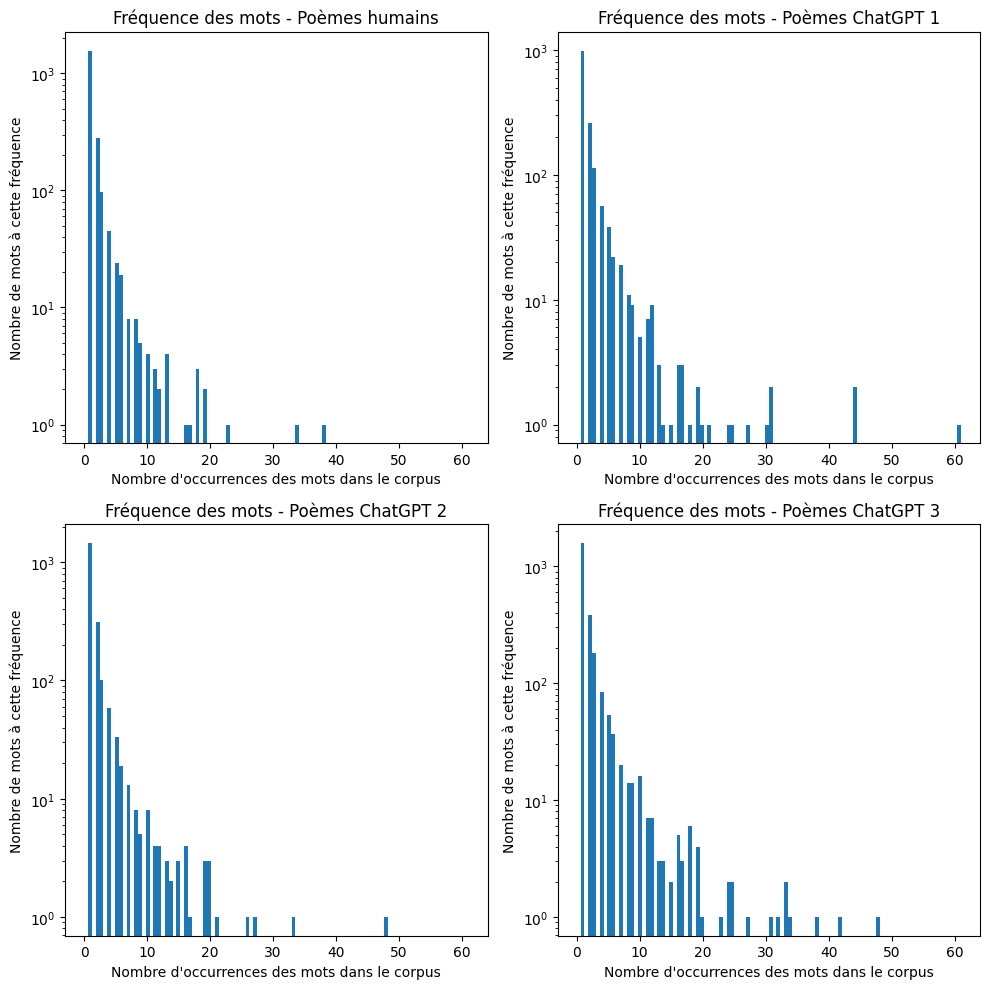

In [21]:
import matplotlib.pyplot as plt

# Get the values for the human poems (HP) distribution
valh = list(words_h.values())

# Get the values for the chatGPT poems (MP) distributions
valm1 = list(words_m1.values())
valm2 = list(words_m2.values())
valm3 = list(words_m3.values())

# Set the same range for all distributions
range_ = (0, max(max(valh), max(valm1), max(valm2), max(valm3)))

# Create a figure with four subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot the HP distribution in the first subplot
ax1.hist(valh, bins=100, range=range_)
ax1.set_xlabel("Nombre d'occurrences des mots dans le corpus")
ax1.set_ylabel('Nombre de mots à cette fréquence')
ax1.set_title('Fréquence des mots - Poèmes humains')
ax1.set_yscale('log')

# Plot the MP1 distribution in the second subplot
ax2.hist(valm1, bins=100, range=range_)
ax2.set_xlabel("Nombre d'occurrences des mots dans le corpus")
ax2.set_ylabel('Nombre de mots à cette fréquence')
ax2.set_title('Fréquence des mots - Poèmes ChatGPT 1')
ax2.set_yscale('log')

# Plot the MP2 distribution in the third subplot
ax3.hist(valm2, bins=100, range=range_)
ax3.set_xlabel("Nombre d'occurrences des mots dans le corpus")
ax3.set_ylabel('Nombre de mots à cette fréquence')
ax3.set_title('Fréquence des mots - Poèmes ChatGPT 2')
ax3.set_yscale('log')

# Plot the MP3 distribution in the fourth subplot
ax4.hist(valm3, bins=100, range=range_)
ax4.set_xlabel("Nombre d'occurrences des mots dans le corpus")
ax4.set_ylabel('Nombre de mots à cette fréquence')
ax4.set_title('Fréquence des mots - Poèmes ChatGPT 3')
ax4.set_yscale('log')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Quels sont les mots les plus fréquents ? 

In [22]:
## quels sont les mots les plus fréquents pour chaque niveau ?
frequent_words_h = [key for key, value in words_h.items() if value >= 15]
frequent_words_m1 = [key for key, value in words_m1.items() if value >= 15]
frequent_words_m2 = [key for key, value in words_m2.items() if value >= 15]
frequent_words_m3 = [key for key, value in words_m3.items() if value >= 15]

print('Mots les plus fréquents : H')
print(frequent_words_h)
print(f'Nombre de mots présents plus de 15 fois dans le corpus : {len(frequent_words_h)}')
print('----------------------------------')
print('Mots les plus fréquents : M1')
print(frequent_words_m1)
print(f'Nombre de mots présents plus de 15 fois dans le corpus : {len(frequent_words_m1)}')
print('----------------------------------')
print('Mots les plus fréquents : M2')
print(frequent_words_m2)
print(f'Nombre de mots présents plus de 15 fois dans le corpus : {len(frequent_words_m2)}')
print('----------------------------------')
print('Mots les plus fréquents : M3')
print(frequent_words_m3)
print(f'Nombre de mots présents plus de 15 fois dans le corpus : {len(frequent_words_m3)}')


Mots les plus fréquents : H
['quand', 'a', 'sous', 'où', 'sans', 'si', 'comme', 'tout', 'bien', 'plus']
Nombre de mots présents plus de 15 fois dans le corpus : 10
----------------------------------
Mots les plus fréquents : M1
['ciel', 'nuit', 'beauté', 'sans', 'étoiles', 'pensées', 'sens', 'vers', 'comme', 'vie', 'où', 'monde', "l'amour", 'cœur', 'temps', 'mots', 'vent', 'tout', 'a', "d'un", 'ô']
Nombre de mots présents plus de 15 fois dans le corpus : 21
----------------------------------
Mots les plus fréquents : M2
['nuit', 'vent', 'sous', 'soleil', 'monde', 'vie', 'a', 'yeux', 'jamais', 'où', 'sans', 'temps', 'plus', 'comme', 'amour', 'ciel', 'tout', 'si', 'cœur']
Nombre de mots présents plus de 15 fois dans le corpus : 19
----------------------------------
Mots les plus fréquents : M3
['tel', 'cieux', 'éclat', 'doux', 'car', 'jamais', 'beauté', 'ô', "d'un", 'amour', 'cœur', 'où', 'yeux', 'comme', "d'une", "l'amour", 'temps', 'si', 'vie', 'a', 'sans', 'leurs', 'échos', 'monde', '

**Remarque** : les mots les plus fréquents des poèmes humains sont des "stopwords"; des mots de liaison qui n'ont pas de contenu sémantique. (peut-être faudrait-il trouver un moyen de les éliminer au pre-processing ??)  Alors que les poèmes de ChatGPT contiennent beaucoup de noms fréquents, comme "ciel", "amour", "temps", etc. 

### 2.4 Richesse lexicale : différents métriques 

Dans cette section, nous allons utiliser les indications de richesse lexicale pourvus par le package "LexicalRichness" : 
- Measure of Textual Lexical Diversity (MTLD) 
- Hypergeometric distribution diversity (HD-D) measure
- Maas's lexical diversity measure

<span style="color:red"> ajouter description des différentes mesures !</span>

In [23]:
# nous allons ajouter ces 3 différents index à notre dataframe

for idx, row in df_poems.iterrows():
    lex = LexicalRichness(row['poem'])
    df_poems.loc[idx, 'mtld'] = lex.mtld(threshold=0.72)
    df_poems.loc[idx, 'hd-d'] = lex.hdd(draws=42)
    df_poems.loc[idx, 'maas'] = lex.Maas

df_poems.head()

,file_name,poem,human_machine,reference,words,terms,ratio,tokens,num_tokens,tokens_unique,num_tokens_unique,ratio_token,mtld,hd-d,maas
0,43sa.txt,"fade rumeur de jour, l’aube emplit sa besace d...",H,"Francis Etienne Sicard, Lettres de soie rouge,...",107.0,81.0,0.757009,"[fade, rumeur, jour, aube, emplit, besace, bri...",64.0,"{satin, courtine, entend, buis, aube, immense,...",63,0.984375,123.296923,0.859826,0.012749
1,40sm2.txt,"le soleil, sur le sable, ô lutteuse endormie, ...",H,"Stéphane Mallarmé, Tristesse d'été",110.0,91.0,0.827273,"[soleil, sable, ô, lutteuse, endormie, or, che...",63.0,"{accalmie, néant, chauffe, endormie, tiède, sa...",61,0.968254,178.315789,0.925069,0.008582
2,10ar4.txt,c’est un large buffet sculpté ; le chêne sombr...,H,"Arthur Rimbaud, Le buffet",122.0,87.0,0.713115,"[large, buffet, sculpté, chêne, sombre, très, ...",78.0,"{médaillons, peints, jaunes, parfum, vieux, ge...",71,0.910256,100.892734,0.839545,0.014650
3,20ga2.txt,sous le pont mirabeau coule la seine et nos am...,H,"Guillaume Apollinaire, Le Pont Mirabeau",130.0,62.0,0.476923,"[sous, pont, mirabeau, coule, seine, amours, f...",85.0,"{venait, souvienne, cette, mains, jours, heure...",47,0.552941,37.804400,0.720379,0.031250
4,42sm4.txt,la nuit approbatrice allume les onyx de ses on...,H,"Stéphane Mallarmé, Sonnet en X",111.0,85.0,0.765766,"[nuit, approbatrice, allume, onyx, ongles, pur...",62.0,"{fixe, consoles, tous, puiser, l'absence, soir...",61,0.983871,132.687692,0.870923,0.012033


In [24]:
# calculer les moyennes de ces 3 index pour les 4 groupes 

# on crée une nouvelle colonne pour identifier les groupes 
for idx, row in df_poems.iterrows():
    if row.reference == 'ChatGPT Level 1':
        df_poems.loc[idx, 'group'] = 'M1'
    elif row.reference == 'ChatGPT Level 2':
        df_poems.loc[idx, 'group'] = 'M2'
    elif row.reference == 'ChatGPT Level 3':
        df_poems.loc[idx, 'group'] = 'M3'
    else:
        df_poems.loc[idx, 'group'] = 'H'


# On calcule la moyenne des 3 index pour chaque groupe 
mean_values = df_poems.groupby('group')[['mtld', 'hd-d', 'maas']].mean()

print(mean_values)

             mtld      hd-d      maas
group                                
H      128.059979  0.874191  0.012393
M1      88.892789  0.831924  0.016874
M2      99.414968  0.845895  0.015442
M3     115.443008  0.853896  0.015840


Ces résultats correspondent à ce que l'on pouvait attendre. En effet, la valeur moyenne de MLTD la plus élevée pour le groupe des poèmes humains, et la moins élevée pour les poèmes de ChatGPT niveau 1, suggérant que ceux-ci font montre d'une diversité lexicale moindre. En outre, il est intéressant de remarquer que la valeur moyenne entre le niveau 1 et le niveau 2 augmente <span style="color:red"> d'environ 12</span>, entre le niveau 2 et le niveau 3 <span style="color:red"> d'environ 15</span>, et <span style="color:red"> d'environ 13</span> entre le niveau 3 et les poèmes humains ; soit une augmentation assez régulière à chaque fois. Donc, bien que le groupe "humain" soit en tête de pellotton, il n'est pas <span style="color:red"> si loin devant</span>. 

L'on observe une progression analogue pour l'index hd-d ; avec une augmentation comprise entre <span style="color:red">dire ordre de grandeur</span> progressant des poèmes ChatGPT niveau 1 aux poèmes humains. 

Quand à l'indice de diversité de Maas, <span style="color:red"> dire quelque chose</span>... 

### 2.5  Déviation par rapport au groupe de contrôle (H)

In [25]:
# deviation from H (control) 
df_poems.sample(5)

,file_name,poem,human_machine,reference,words,terms,ratio,tokens,num_tokens,tokens_unique,num_tokens_unique,ratio_token,mtld,hd-d,maas,group
136,31pc5.txt,"ma belle, si mon âme a quelques blessures enco...",M,ChatGPT Level 2,181.0,120.0,0.662983,"[belle, si, âme, a, quelques, blessures, encor...",90.0,"{enchanter, visages, verrez, trésors, a, quand...",83,0.922222,102.305695,0.846372,0.015209,M2
115,23gn2.txt,"je pense à toi, ma belle muse inspirante, aux ...",M,ChatGPT Level 2,132.0,95.0,0.719697,"[pense, belle, muse, inspirante, rayons, solei...",68.0,"{depuis, douce, pense, sais, mains, nectar, ca...",67,0.985294,124.028986,0.866166,0.013796,M2
149,35pv2.txt,sombre et délicat tel un camélia noir il s'épa...,M,ChatGPT Level 2,125.0,89.0,0.712000,"[sombre, délicat, tel, camélia, noir, s'épanou...",69.0,"{vole, camélia, cailloux, délicat, amants, per...",66,0.956522,98.634547,0.850739,0.014571,M2
73,34pv1.txt,"mon cher ami, je vais essayer d'écrire un sonn...",M,ChatGPT Level 1,94.0,68.0,0.723404,"[cher, ami, vais, essayer, d'écrire, sonnet, s...",52.0,"{vers, étoiles, tranquilles, verlaine, donc, b...",50,0.961538,94.578462,0.830723,0.015686,M1
2,10ar4.txt,c’est un large buffet sculpté ; le chêne sombr...,H,"Arthur Rimbaud, Le buffet",122.0,87.0,0.713115,"[large, buffet, sculpté, chêne, sombre, très, ...",78.0,"{médaillons, peints, jaunes, parfum, vieux, ge...",71,0.910256,100.892734,0.839545,0.014650,H


In [32]:
#créer une nouvelle df : 150 lignes : col =file_name, group (m1-2-3), values (écart avec H) 

# liste des colonnes de la nouvelle df 
list_of_columns = df_poems.columns.tolist()
useless_cols = ['poem', 'human_machine', 'reference', 'tokens', 'tokens_unique']
list_of_columns = [item for item in list_of_columns if item not in useless_cols]

non_numeric = ['file_name', 'group']
list_of_values = [item for item in list_of_columns if item not in non_numeric]

# initialisation de la nouvelle df
df_matched = pd.DataFrame(columns = [list_of_columns])

# pour chaque groupe M, matcher tous les poèmes avec le poème H du meme nom (file_name)
# calculer la différence de toutes les valeurs (list_of_values) 
# stocker ces différences dans df_matched 

h = df_poems[df_poems['group']=='H']
m1 = df_poems[df_poems['group']=='M1']
m2 = df_poems[df_poems['group']=='M2']
m3 = df_poems[df_poems['group']=='M3']

for idx1, row1, in m1.iterrows():
    df_matched.loc[idx1, 'file_name'] = row1['file_name']
    df_matched.loc[idx1, 'group'] = 'M1'
    for idxh, rowh in h.iterrows():
        if row1['file_name'] == rowh['file_name']:
            for val in list_of_values:
                df_matched.loc[idx1, val] = row1[val] - rowh[val]

for idx1, row1, in m2.iterrows():
    df_matched.loc[idx1, 'file_name'] = row1['file_name']
    df_matched.loc[idx1, 'group'] = 'M2'
    for idxh, rowh in h.iterrows():
        if row1['file_name'] == rowh['file_name']:
            for val in list_of_values:
                df_matched.loc[idx1, val] = row1[val] - rowh[val]

for idx1, row1, in m3.iterrows():
    df_matched.loc[idx1, 'file_name'] = row1['file_name']
    df_matched.loc[idx1, 'group'] = 'M3'
    for idxh, rowh in h.iterrows():
        if row1['file_name'] == rowh['file_name']:
            for val in list_of_values:
                df_matched.loc[idx1, val] = row1[val] - rowh[val]

df_matched.sample(5)              


,file_name,words,terms,ratio,num_tokens,num_tokens_unique,ratio_token,mtld,hd-d,maas,group
199,35pv2.txt,-2.0,-9.0,-0.070761,0.0,-6,-0.090909,-54.434309,-0.068992,0.004451,M3
51,40sm2.txt,3.0,-13.0,-0.137007,-7.0,-8,-0.021825,-77.742476,-0.086734,0.008004,M1
77,41sm3.txt,10.0,-9.0,-0.168922,-12.0,-15,-0.060087,-105.583333,-0.087917,0.009643,M1
149,35pv2.txt,18.0,5.0,-0.073047,3.0,1,-0.028327,-40.744583,-0.03431,0.003487,M2
170,44st.txt,154.0,65.0,-0.199728,87.0,60,-0.1518,-17.510619,-0.034075,0.006247,M3


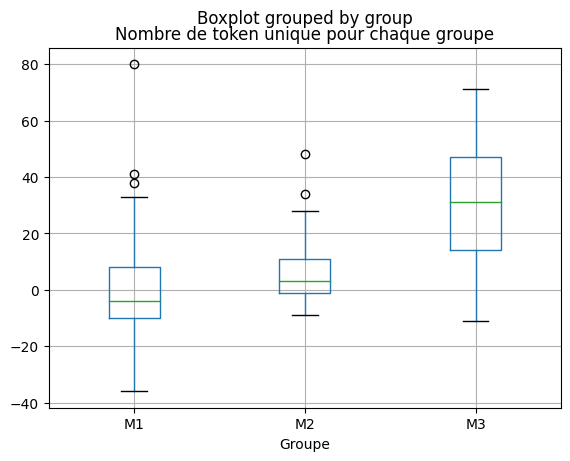

In [51]:
import matplotlib.pyplot as plt

# pour chaque metrique faire un boxplot pour M1-2-3
# Convert the DataFrame to a CSV file
df_matched.to_csv('df_matched.csv', index=False)
df_matched_new = pd.read_csv('df_matched.csv')


# num_tokens_unique
df_matched_new.boxplot(column='num_tokens_unique', by='group')

plt.title('Nombre de token unique pour chaque groupe')
plt.xlabel('Groupe')

plt.show()


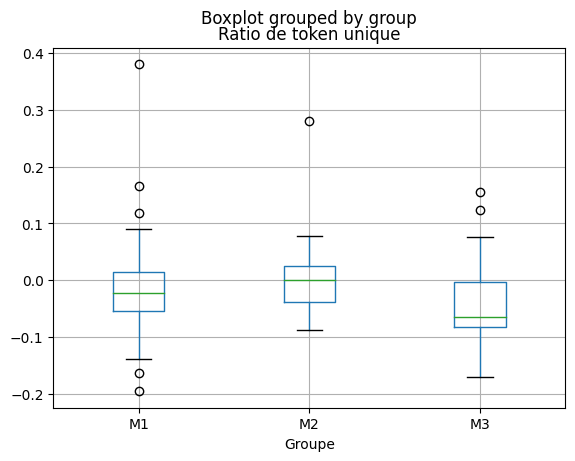

In [50]:
# ratio_token
df_matched_new.boxplot(column='ratio_token', by='group')

plt.title('Ratio de token unique')
plt.xlabel('Groupe')

plt.show()

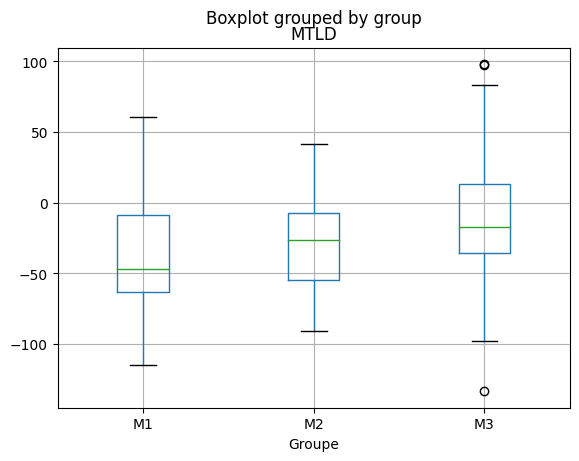

In [52]:
# mtld
df_matched_new.boxplot(column='mtld', by='group')

plt.title('MTLD')
plt.xlabel('Groupe')

plt.show()


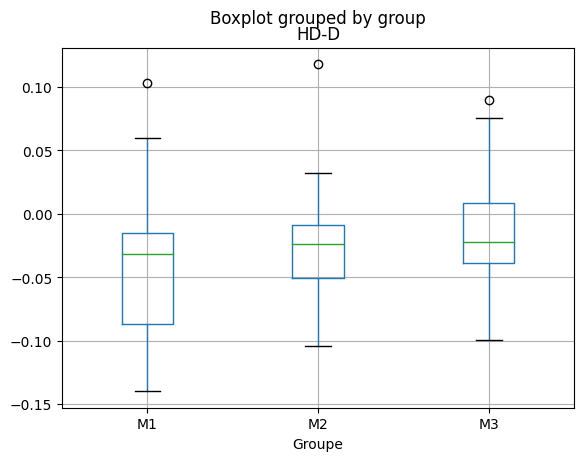

In [53]:
# hd-d
df_matched_new.boxplot(column='hd-d', by='group')

plt.title('HD-D')
plt.xlabel('Groupe')

plt.show()


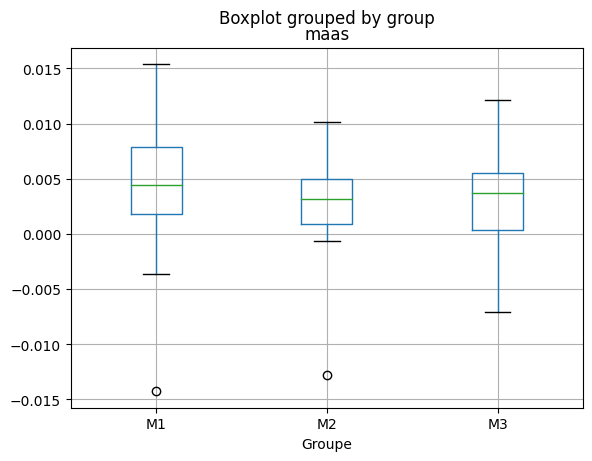

In [54]:
# maas 
df_matched_new.boxplot(column='maas', by='group')

plt.title('maas')
plt.xlabel('Groupe')

plt.show()


In [26]:
# intégrer dans la matched_df :
# boxplots : ajouter median et interquartal range --> report (en plus de la moyenne) 
# tester significativité : wilcoxon (signed rank test)

# comparer pair wise les metrics (faire ref à article) 

## 3. Analyse thématique : Topic Modelling 

Dans la partie 2, nous avons effectué des analyses de diversité lexicale. Cela nous a permis de montrer que le langage de ChatGPT était plus pauvre en terme de diversité des termes utilisés, mais que celle-ci augmentait avec la complexification des prompts. 

À présent, nous souhaitons élargir notre analyse pour considérer, nous pas les termes individuels, mais les thèmes abordés par les poèmes. Pour cela, nous souhaitons tenter une approche de "Topic Modelling". Pour ce faire, nous allons rassembler l'ensemble des poèmes de chaque groupe en un seul texte et performer un Latent Dirichlet Allocation (LDA) sur les quatre textes. Le modèle LDA demande que l'on spécifie à l'avance le nombre de thèmes (topics) que l'on souhaite recevoir, nous allons fixer un nombre fixe des thèmes à retourner (10), et comparer ceux-ci. La diversité ou la redondances des thèmes retournés constituera ainsi un indicateur de la diversité thématique des poèmes.  


Pour cette partie, nous avons bénéficié du tutoriel fourni par https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py

In [41]:
# faire de tous les poèmes un seul texte par groupe. 
df_h = df_poems[df_poems['group']=='H']
df_m1 = df_poems[df_poems['group']=='M1']
df_m2 = df_poems[df_poems['group']=='M2']
df_m3 = df_poems[df_poems['group']=='M3']

docs_h = [poem for poem in df_h.poem]
docs_m1 = [poem for poem in df_m1.poem]
docs_m2 = [poem for poem in df_m2.poem]
docs_m3 = [poem for poem in df_m3.poem]


In [42]:
# meme si nous avons déja effectué un pre-processing plus haut, nous allons exécuté celui suggéré par le tutoriel.

# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs_h)):
    docs_h[idx] = docs_h[idx].lower()  # Convert to lowercase.
    docs_h[idx] = tokenizer.tokenize(docs_h[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs_h = [[token for token in doc if not token.isnumeric()] for doc in docs_h]

# Remove words that are only one character.
docs_h = [[token for token in doc if len(token) > 1] for doc in docs_h]

In [43]:
# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs_h = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs_h]

In [44]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary_h = Dictionary(docs_h)

# Filter out words that occur too rarely or too frequently
dictionary_h.filter_extremes(no_below=1, no_above=0.5)

In [45]:
# Bag-of-words representation of the documents.
corpus_h = [dictionary_h.doc2bow(doc) for doc in docs_h]

In [46]:
# ON REPETE LE PROCESSUS POUR LES POEMES M1 M2 et M3

# M1
for idx in range(len(docs_m1)):
    docs_m1[idx] = docs_m1[idx].lower()  
    docs_m1[idx] = tokenizer.tokenize(docs_m1[idx]) 

docs_m1 = [[token for token in doc if not token.isnumeric()] for doc in docs_m1]
docs_m1 = [[token for token in doc if len(token) > 1] for doc in docs_m1]
docs_m1 = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs_m1]

dictionary_m1 = Dictionary(docs_m1)
dictionary_m1.filter_extremes(no_below=1, no_above=0.5)
corpus_m1 = [dictionary_m1.doc2bow(doc) for doc in docs_m1]

# M2
for idx in range(len(docs_m2)):
    docs_m2[idx] = docs_m2[idx].lower()  
    docs_m2[idx] = tokenizer.tokenize(docs_m2[idx]) 

docs_m2 = [[token for token in doc if not token.isnumeric()] for doc in docs_m2]
docs_m2 = [[token for token in doc if len(token) > 1] for doc in docs_m2]
docs_m2 = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs_m2]

dictionary_m2 = Dictionary(docs_m2)
dictionary_m2.filter_extremes(no_below=1, no_above=0.5)
corpus_m2 = [dictionary_m2.doc2bow(doc) for doc in docs_m2]

# M3
for idx in range(len(docs_m3)):
    docs_m3[idx] = docs_m3[idx].lower()  
    docs_m3[idx] = tokenizer.tokenize(docs_m3[idx]) 

docs_m3 = [[token for token in doc if not token.isnumeric()] for doc in docs_m3]
docs_m3 = [[token for token in doc if len(token) > 1] for doc in docs_m3]
docs_m3 = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs_m3]

dictionary_m3 = Dictionary(docs_m3)
dictionary_m3.filter_extremes(no_below=1, no_above=0.5)
corpus_m3 = [dictionary_m3.doc2bow(doc) for doc in docs_m3]

In [47]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# H 

# Make an index to word dictionary.
temp_h = dictionary_h[0]  # This is only to "load" the dictionary.
id2word_h = dictionary_h.id2token

model_h = LdaModel(
    corpus=corpus_h,
    id2word=id2word_h,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

# M1 

temp_m1 = dictionary_m1[0] 
id2word_m1 = dictionary_m1.id2token

model_m1 = LdaModel(
    corpus=corpus_m1,
    id2word=id2word_m1,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

# M2 

temp_m2 = dictionary_m2[0] 
id2word_m2 = dictionary_m2.id2token

model_m2 = LdaModel(
    corpus=corpus_m2,
    id2word=id2word_m2,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

# M3

temp_m3 = dictionary_m3[0]  
id2word_m3 = dictionary_m3.id2token

model_m3 = LdaModel(
    corpus=corpus_m3,
    id2word=id2word_m3,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [48]:
# Top topics for each group 
top_topics_h = model_h.top_topics(corpus_h)
top_topics_m1 = model_m1.top_topics(corpus_m1)
top_topics_m2 = model_m2.top_topics(corpus_m2)
top_topics_m3 = model_m3.top_topics(corpus_m3)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence_h = sum([t[1] for t in top_topics_h]) / num_topics
print('HUMAN DATASET : ')
print('Average topic coherence: %.4f.' % avg_topic_coherence_h)
from pprint import pprint
pprint(top_topics_h)
print('----------------------------------')

avg_topic_coherence_m1 = sum([t[1] for t in top_topics_m1]) / num_topics
print('CHATGPT LEVEL 1 : ')
print('Average topic coherence: %.4f.' % avg_topic_coherence_m1)
from pprint import pprint
pprint(top_topics_m1)
print('----------------------------------')

avg_topic_coherence_m2 = sum([t[1] for t in top_topics_m2]) / num_topics
print('CHATGPT LEVEL 2 : ')
print('Average topic coherence: %.4f.' % avg_topic_coherence_m2)
from pprint import pprint
pprint(top_topics_m2)
print('----------------------------------')

avg_topic_coherence_m3 = sum([t[1] for t in top_topics_m3]) / num_topics
print('CHATGPT LEVEL 3 : ')
print('Average topic coherence: %.4f.' % avg_topic_coherence_m3)
from pprint import pprint
pprint(top_topics_m3)

HUMAN DATASET : 
Average topic coherence: -2.9889.
[([(0.015799843, 'au'),
   (0.014973277, 'sur'),
   (0.012493594, 'il'),
   (0.010836852, 'sa'),
   (0.009183547, 'son'),
   (0.008357407, 'comme'),
   (0.008356356, 'ne'),
   (0.007528576, 'où'),
   (0.0067011644, 'une'),
   (0.0058744936, 'ce'),
   (0.0058742217, 'plus'),
   (0.0058738515, 'ciel'),
   (0.0050480966, 'pour'),
   (0.0050478037, 'tu'),
   (0.0050473176, 'se'),
   (0.0050465004, 'aux'),
   (0.00504646, 's'),
   (0.0050456706, 'nous'),
   (0.0042204447, 'bien'),
   (0.0042204172, 'je')],
  -1.1943474504307001),
 ([(0.018956805, 'comme'),
   (0.00957218, 'son'),
   (0.007695254, 'ou'),
   (0.007695254, 'ne'),
   (0.005818902, 'ce'),
   (0.005818621, 'sa'),
   (0.0058185603, 'avec'),
   (0.0058183265, 'si'),
   (0.0058183256, 'quelque'),
   (0.0058183256, 'pour'),
   (0.0058183256, 'main'),
   (0.0058183256, 'il'),
   (0.0039422293, 'aux'),
   (0.003941801, 'je'),
   (0.0039416905, 'quand'),
   (0.003941681, 'me'),
   (0.00

#### AUTRE TENTATIVE:  GSDMM 

Pour cette partie, nous nous sommes inspirés du tutoriel suivant : 
https://towardsdatascience.com/short-text-topic-modelling-lda-vs-gsdmm-20f1db742e14


In [36]:
# importing libraries
import pandas as pd
import numpy as np
import gensim
from gsdmm import MovieGroupProcess

doxs_h = df_h.poem.to_numpy()
doxs_m1 = df_m1.poem.to_numpy()
doxs_m2 = df_m2.poem.to_numpy()
doxs_m3 = df_m3.poem.to_numpy()

vocab_length_h = len(dictionary_h)
vocab_length_m1 = len(dictionary_m1)
vocab_length_m2 = len(dictionary_m2)
vocab_length_m3 = len(dictionary_m3)

# initialize GSDMM
gsdmm = MovieGroupProcess(K=15, alpha=0.1, beta=0.3, n_iters=15)

# fit GSDMM model 
y_h = gsdmm.fit(doxs_h, vocab_length_h)
# y_m1 = gsdmm.fit(doxs_m1, vocab_length_m1)
# y_m2 = gsdmm.fit(doxs_m2, vocab_length_m2)
# y_m3 = gsdmm.fit(doxs_m3, vocab_length_m3)


In stage 0: transferred 44 clusters with 1 clusters populated
In stage 1: transferred 0 clusters with 1 clusters populated
In stage 2: transferred 0 clusters with 1 clusters populated
In stage 3: transferred 0 clusters with 1 clusters populated
In stage 4: transferred 0 clusters with 1 clusters populated
In stage 5: transferred 0 clusters with 1 clusters populated
In stage 6: transferred 0 clusters with 1 clusters populated
In stage 7: transferred 0 clusters with 1 clusters populated
In stage 8: transferred 0 clusters with 1 clusters populated
In stage 9: transferred 0 clusters with 1 clusters populated
In stage 10: transferred 0 clusters with 1 clusters populated
In stage 11: transferred 0 clusters with 1 clusters populated
In stage 12: transferred 0 clusters with 1 clusters populated
In stage 13: transferred 0 clusters with 1 clusters populated
In stage 14: transferred 0 clusters with 1 clusters populated


In [37]:
# ADAPTER ??
# print number of documents per topic
doc_count = np.array(gsdmm.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(gsdmm.cluster_word_distribution, top_index, 20)


Number of documents per topic : [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 50]
Most important clusters (by number of docs inside): [14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]

Cluster 14 : [(' ', 5899), ('e', 3847), ('s', 2314), ('a', 1841), ('n', 1743), ('u', 1736), ('r', 1736), ('i', 1661), ('t', 1613), ('o', 1432), ('l', 1421), ('d', 908), ('m', 856), ('c', 703), ('p', 581), (',', 557), ('v', 401), ('é', 347), ('f', 335), ('b', 320)]

Cluster 13 : []

Cluster 12 : []

Cluster 11 : []

Cluster 10 : []

Cluster 9 : []

Cluster 8 : []

Cluster 7 : []

Cluster 6 : []

Cluster 5 : []

Cluster 4 : []

Cluster 3 : []

Cluster 2 : []

Cluster 1 : []

Cluster 0 : []


In [ ]:
# Import wordcloud library
from wordcloud import WordCloud

# Get topic word distributions from gsdmm model
cluster_word_distribution = gsdmm.cluster_word_distribution

# Select topic you want to output as dictionary (using topic_number)
topic_dict = sorted(cluster_word_distribution[topic_number].items(), key=lambda k: k[1], reverse=True)[:values]

# Generate a word cloud image
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1800,
                            height=700,
                            font_path=path_to_font,
                            colormap='flag').generate_from_frequencies(topic_dict)

# Print to screen
fig, ax = plt.subplots(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

# Save to disk
wordcloud_24.to_file(path_to_file)